### Вихідна функція

In [1]:
import numpy as np

a = 4
n_var = 25 # не кратний двом, отже, інтерполяція методом Лагранжа
k = (n_var - 21)*2

def y(x):
    return x**2/15 + np.cos(x + a)

xi = [-6 + k, -4 + k, -2 + k, 0+k, 2+ k]

yi = [y(x) for x in xi]

print("Вузли інтерполяції: ", xi)

Вузли інтерполяції:  [2, 4, 6, 8, 10]


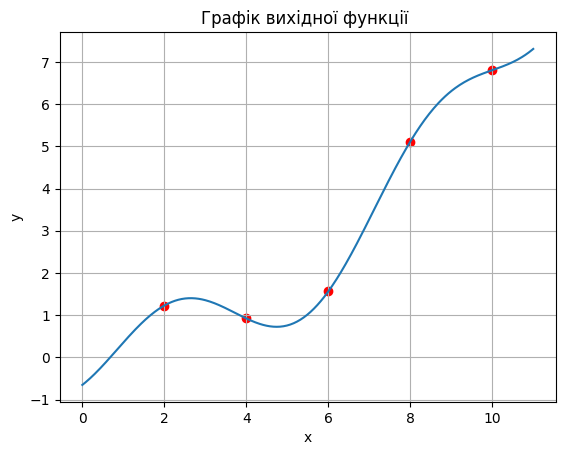

In [2]:
import matplotlib.pyplot as plt
x_values = np.linspace(0, 11, 400)
y_values = y(x_values)

# Create the plot
plt.plot(x_values, y_values)
plt.scatter(xi, yi, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Графік вихідної функції ')
plt.grid(True)
plt.show()

## Інтерполяція функції методом Лагранжа

In [3]:
from LabWork6.LagrangeMethod import lagrange_method
lagrange_polynom = lagrange_method(y, xi)
print("Поліном Лагранжа: ", lagrange_polynom)

Значення функції в вузлах інтерполяції:  [1.2268369533170327, 0.9211666328580531, 1.5609284709235474, 5.110520625399158, 6.8034038848745]
Поліном Лагранжа:  -0.0175284827325417*x**4 + 0.391494616273452*x**3 - 2.82690810221169*x**2 + 7.95018212528902*x - 6.21739609488118


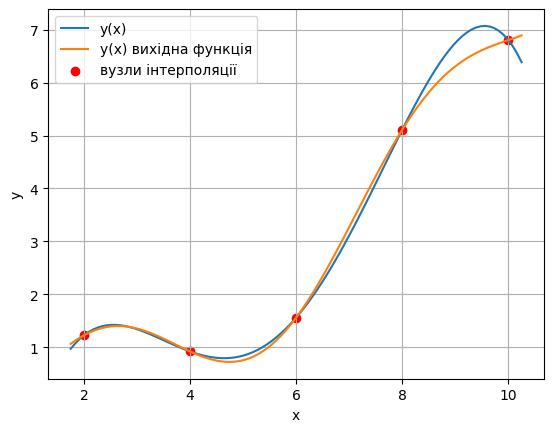

In [4]:
from sympy import symbols, lambdify

x = symbols('x')
f = lambdify(x, lagrange_polynom)

x_values_lagrange = np.linspace(min(xi) - 0.25, max(xi) + 0.25, 100)
y_values_lagrange = f(x_values_lagrange)

y_ethalon = y(x_values_lagrange)

plt.plot(x_values_lagrange, y_values_lagrange, label='y(x)')
plt.plot(x_values_lagrange, y_ethalon, label='y(x) вихідна функція')
plt.scatter(xi, yi, color='red', label='вузли інтерполяції')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()


## Кубічна сплайн-інтерполяція

In [5]:
from LabWork6.CubeSplainInterpolation import cube_splain_interpolation
print("Кубічна сплайн-інтерполяція")
S = cube_splain_interpolation(xi, yi)
print("Кубічний сплайн: ", S)

Кубічна сплайн-інтерполяція
Кубічні сплайни:  [a1 + b1*(x - 2) + c1*(x - 2)**2 + d1*(x - 2)**3, a2 + b2*(x - 4) + c2*(x - 4)**2 + d2*(x - 4)**3, a3 + b3*(x - 6) + c3*(x - 6)**2 + d3*(x - 6)**3, a4 + b4*(x - 8) + c4*(x - 8)**2 + d4*(x - 8)**3]
Система рівнянь: 
 2*b1 + 4*c1 + 8*d1 + 0.30567032045898 = 0
2*b2 + 4*c2 + 8*d2 - 0.639761838065494 = 0
2*b3 + 4*c3 + 8*d3 - 3.54959215447561 = 0
2*b4 + 4*c4 + 8*d4 - 1.69288325947534 = 0
-b1 + b2 - 4*c1 - 12*d1 = 0
-c1 + c2 - 6*d1 = 0
c1 = 0
c4 + 6*d4 = 0
-b2 + b3 - 4*c2 - 12*d2 = 0
-c2 + c3 - 6*d2 = 0
c1 = 0
c4 + 6*d4 = 0
-b3 + b4 - 4*c3 - 12*d3 = 0
-c3 + c4 - 6*d3 = 0
c1 = 0
c4 + 6*d4 = 0
a1 - 1.22683695331703 = 0
a2 - 0.921166632858053 = 0
a3 - 1.56092847092355 = 0
a4 - 5.11052062539916 = 0

Розв'язок:  {a1: 1.22683695331703, a2: 0.921166632858053, a3: 1.56092847092355, a4: 5.11052062539916, b1: -0.158955269311868, b2: -0.140594942064733, b3: 1.22247231398057, b4: 1.53473667495410, c1: 0.0, c2: 0.00918016362356754, c3: 0.672353464399085, c4: -

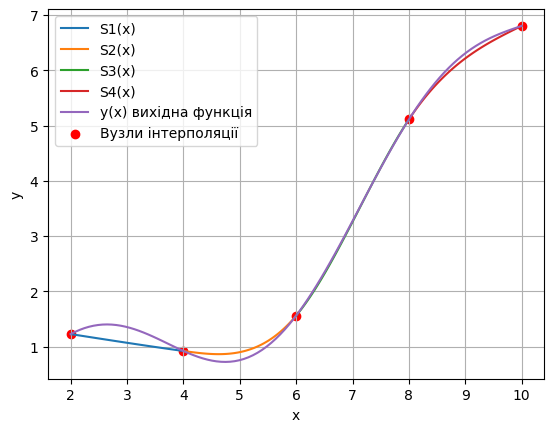

In [6]:
y_values_cube = []
x_values_cube = []

x_values_all = np.linspace(min(xi), max(xi), 100)

y_ethalon = y(x_values_all)

for i in range(len(S)):
    func = lambdify(x, S[i])
    x_values = np.linspace(xi[i], xi[i+1], 100)
    x_values_cube.append(x_values)
    y_values = func(x_values)
    y_values_cube.append(y_values)
    plt.plot(x_values, y_values, label=f'S{i + 1}(x)')
    
plt.plot(x_values_all, y_ethalon, label='y(x) вихідна функція')
plt.scatter(xi, yi, color='red', label='Вузли інтерполяції')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

## Розв'язок інтерполяції математичним пакетом

#### Перевірка методу Лагранжа

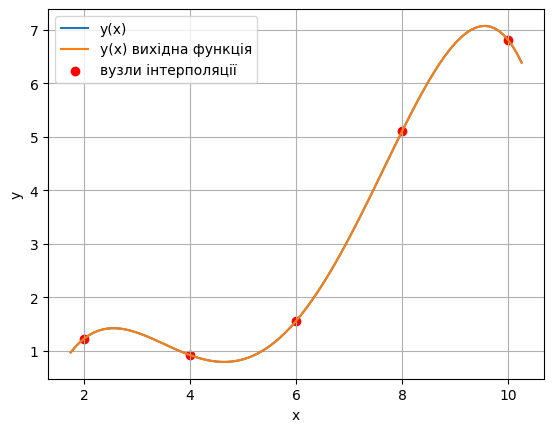

In [7]:
from scipy.interpolate import lagrange
poly = lagrange(xi, yi)

y_values = poly(x_values_lagrange)

plt.plot(x_values_lagrange, y_values_lagrange, label='y(x)')
plt.plot(x_values_lagrange, y_values, label='y(x) вихідна функція')
plt.scatter(xi, yi, color='red', label='вузли інтерполяції')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

#### Перевірка кубічного сплайну

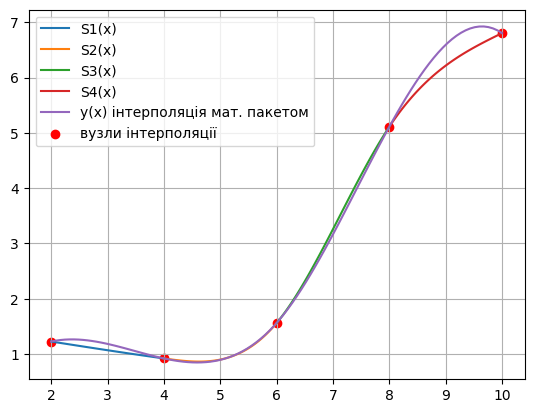

In [8]:
from scipy.interpolate import CubicSpline
y_values_m = CubicSpline(xi, yi)(x_values_all)

for i in range(len(S)):
    func = lambdify(x, S[i])
    x_values = np.linspace(xi[i], xi[i+1], 100)
    y_values = func(x_values)
    plt.plot(x_values, y_values, label=f'S{i + 1}(x)')

plt.plot(x_values_all, y_values_m, label='y(x) інтерполяція мат. пакетом')
plt.scatter(xi, yi, color='red', label='вузли інтерполяції')
plt.legend()
plt.grid(True)
plt.show()